In [1]:
import pandas as pd
import numpy as np

In [2]:
fashion_train_df = pd.read_csv('./data/fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('./data/fashion-mnist_test.csv')

In [3]:
fashion_train_df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [4]:
fashion_train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [5]:
print(set(fashion_train_df['label']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [6]:
print([fashion_train_df.drop(labels='label', axis=1).min(axis=1).min(), 
      fashion_train_df.drop(labels='label', axis=1).max(axis=1).max()])

[0, 255]


In [7]:
fashion_train_df.shape

(60000, 785)

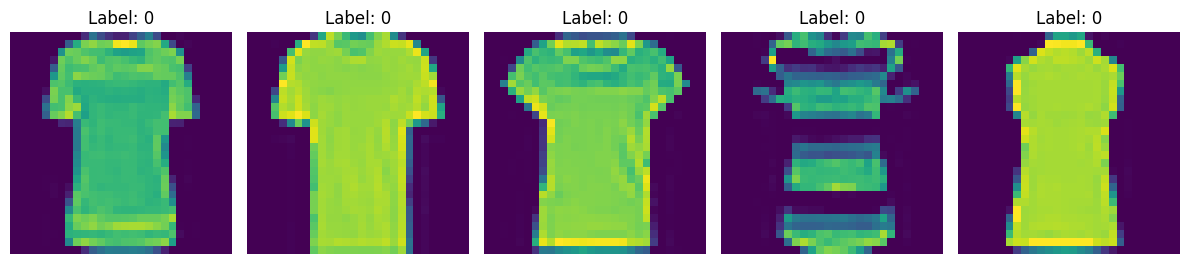

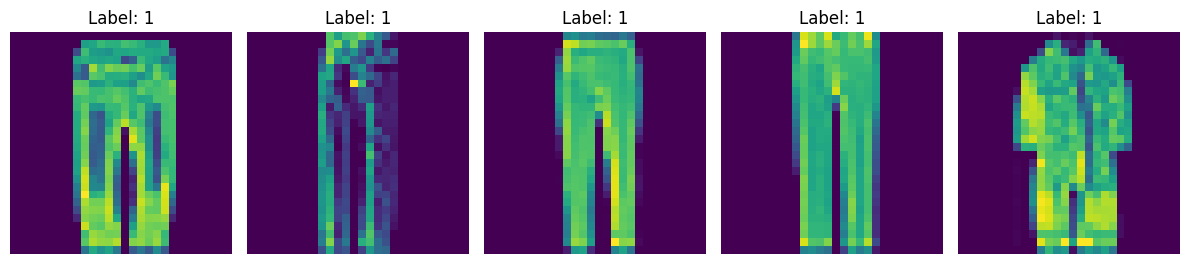

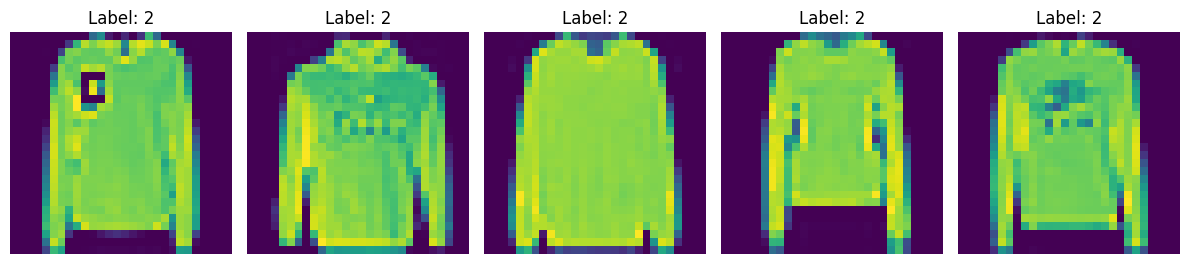

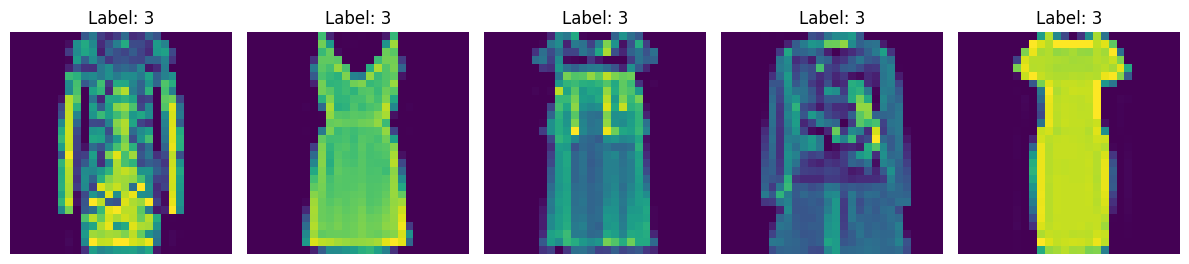

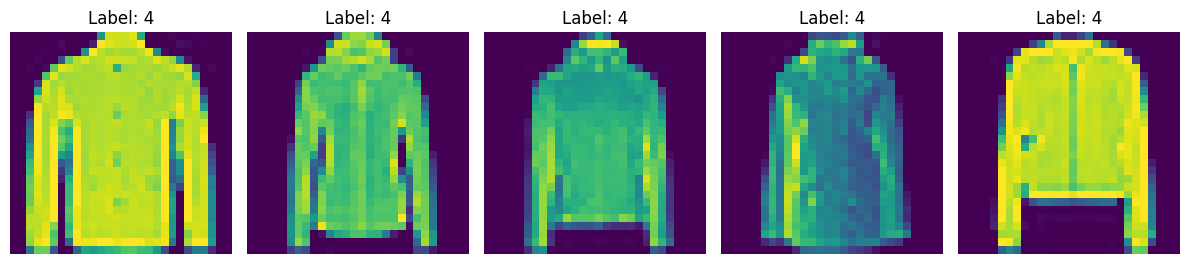

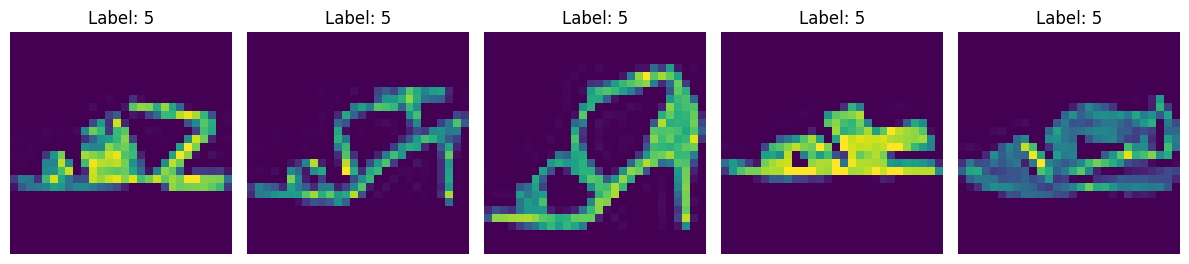

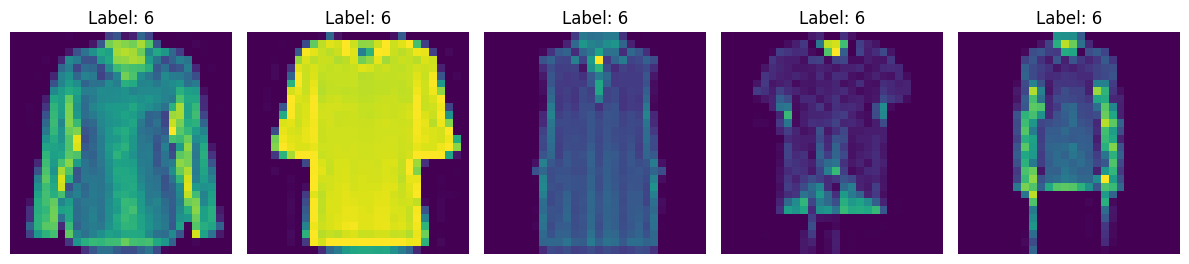

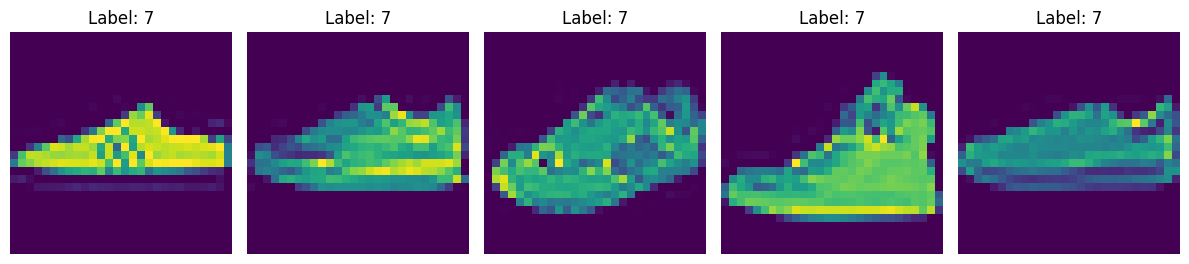

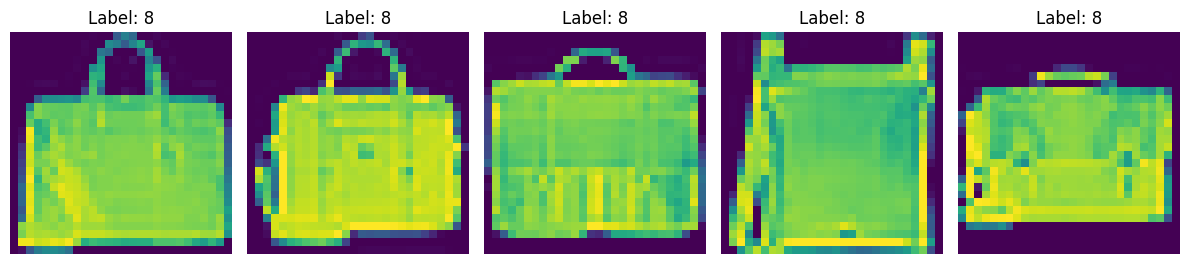

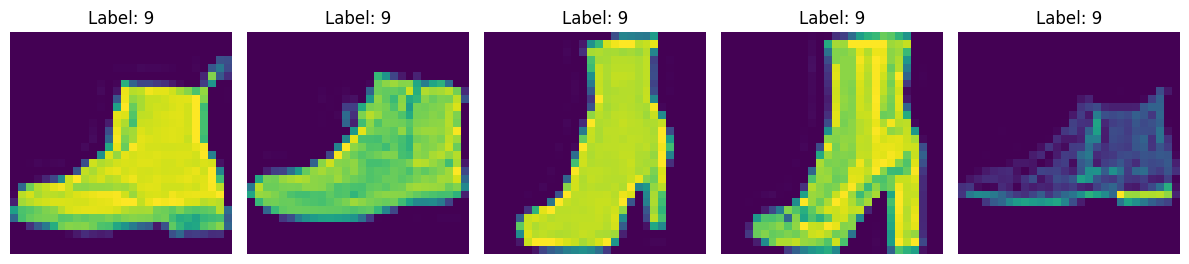

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Iterate through labels 0 to 9
for label_to_print in range(10):
    # Filter the training dataset for images with the specified label
    images_with_label = fashion_train_df[fashion_train_df['label'] == label_to_print].drop(columns='label').values

    # Get the number of images with the specified label
    num_images = len(images_with_label)

    # Show 5 random images with the specified label
    num_images_to_show = min(5, num_images)
    fig, axes = plt.subplots(1, num_images_to_show, figsize=(12, 4))

    for i in range(num_images_to_show):
        index = np.random.randint(0, num_images)
        axes[i].imshow(images_with_label[index].reshape(28, 28))
        axes[i].set_title(f"Label: {label_to_print}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


In [9]:
# convert to numpy arrays and reshape
training = np.asarray(fashion_train_df, dtype='float32')

X_train = training[:, 1:].reshape([-1,28,28,1])
X_train = X_train/255   # Normalizing the data
y_train = training[:, 0]

testing = np.asarray(fashion_test_df, dtype='float32')
X_test = testing[:, 1:].reshape([-1,28,28,1])
X_test = X_test/255    # Normalizing the data
y_test = testing[:, 0]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5) 

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

# Initialize the model
cnn_model = Sequential()

# Add Convolutional layers
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Add Dropout for regularization
cnn_model.add(Dropout(rate=0.5))

# Flatten the feature maps to a 1D vector
cnn_model.add(Flatten())

# Add Dense layers
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=64, activation='relu'))

# Output layer
cnn_model.add(Dense(units=10, activation='softmax'))

2024-04-29 02:19:21.345616: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 02:19:21.350622: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 02:19:21.420965: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 02:19:23.135966: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/sumedh/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inst

In [12]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
print(cnn_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
cnn_model.fit(x=X_train, y=y_train, batch_size=512, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 257ms/step - accuracy: 0.5355 - loss: 1.2929 - val_accuracy: 0.8050 - val_loss: 0.5310
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 245ms/step - accuracy: 0.8065 - loss: 0.5301 - val_accuracy: 0.8375 - val_loss: 0.4448
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 227ms/step - accuracy: 0.8359 - loss: 0.4573 - val_accuracy: 0.8634 - val_loss: 0.3845
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.8550 - loss: 0.4089 - val_accuracy: 0.8712 - val_loss: 0.3576
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 238ms/step - accuracy: 0.8642 - loss: 0.3806 - val_accuracy: 0.8747 - val_loss: 0.3420
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 237ms/step - accuracy: 0.8674 - loss: 0.3634 - val_accuracy: 0.8812 - val_loss: 0.3244
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 246ms/step - accuracy: 0.8750 - loss: 0.3462 - val_accuracy: 0.8891 - val_loss: 0.3111
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 237ms/step - accuracy: 0.8779 - loss: 0.3335 - val_accu

In [15]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8942 - loss: 0.2841
Test Loss: 0.2759711742401123
Test Accuracy: 0.8995000123977661


In [16]:
predict_x=cnn_model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


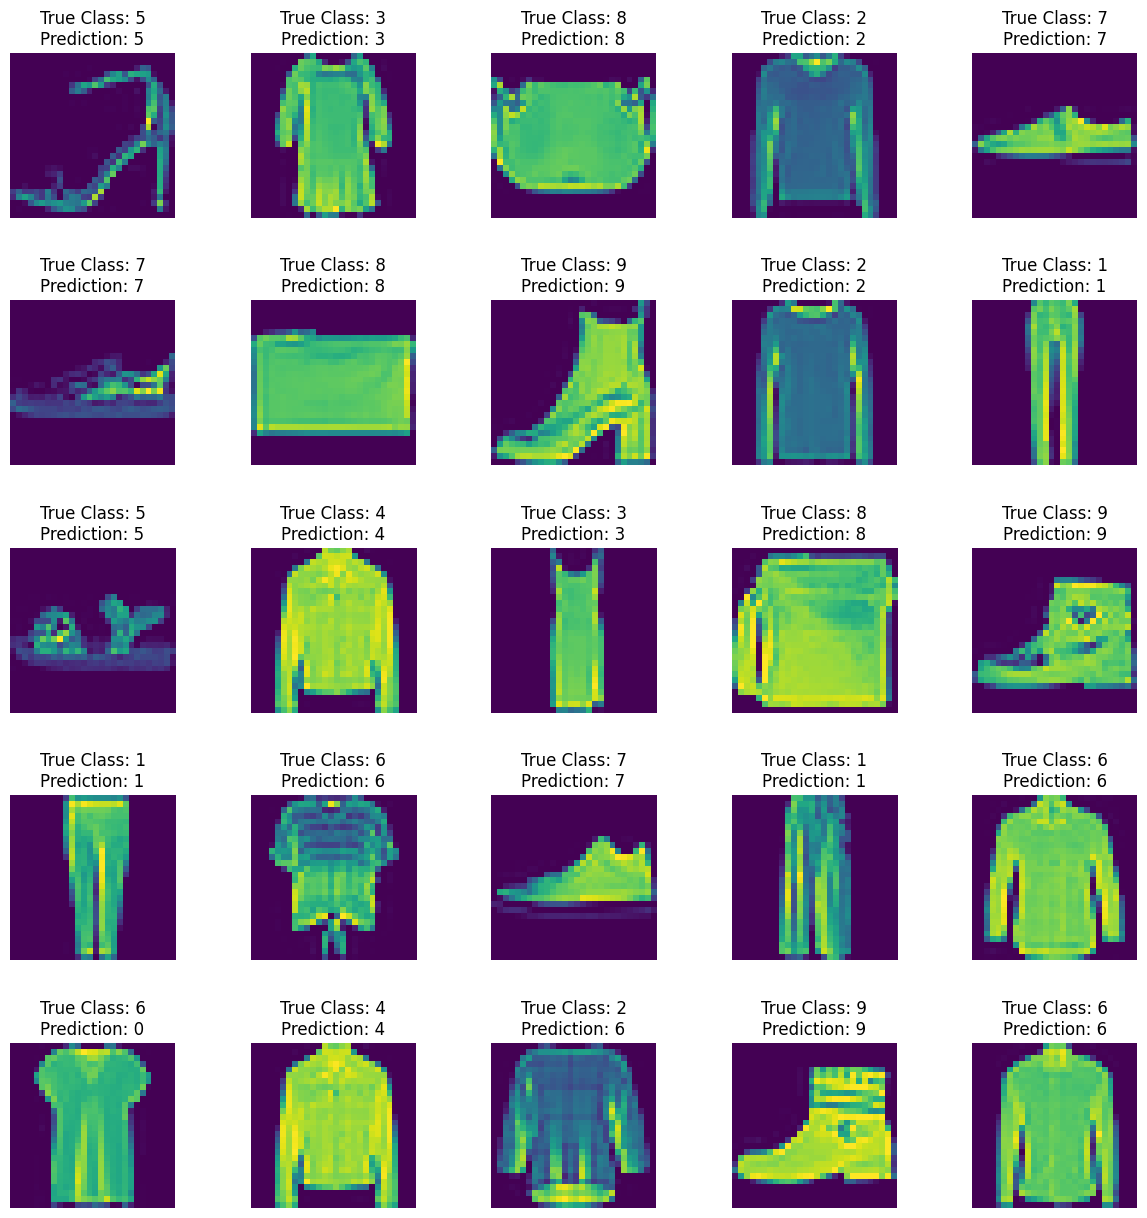

In [17]:
height = 5
width = 5

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(15,15))
axes = axes.ravel()
for i in range(0, height*width):
    index = np.random.randint(len(classes_x))
    axes[i].imshow(X_test[index].reshape((28,28)))
    axes[i].set_title(f"True Class: {int(y_test[index])}\nPrediction: {classes_x[index]}")
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)

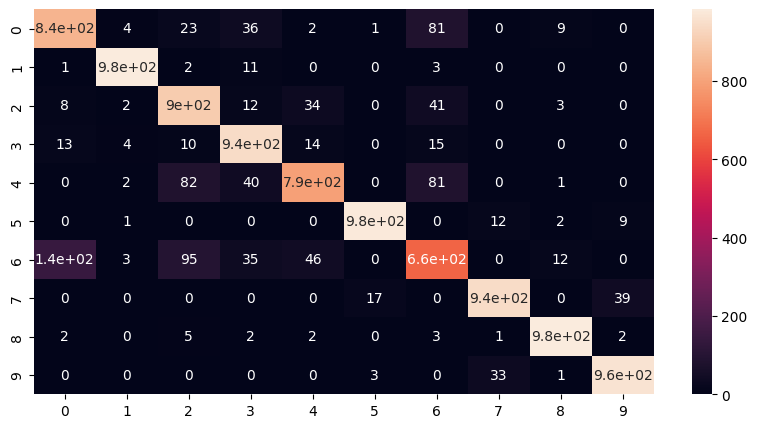

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, classes_x)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)
plt.show()

In [19]:
from sklearn.metrics import classification_report

num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, classes_x, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.83      0.84      0.84      1000
     class 1       0.98      0.98      0.98      1000
     class 2       0.81      0.90      0.85      1000
     class 3       0.87      0.94      0.91      1000
     class 4       0.89      0.79      0.84      1000
     class 5       0.98      0.98      0.98      1000
     class 6       0.75      0.66      0.70      1000
     class 7       0.95      0.94      0.95      1000
     class 8       0.97      0.98      0.98      1000
     class 9       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

